In [1]:
import os
import numpy as np
import cv2
from gtda.images import RadialFiltration
from gtda.homology import VietorisRipsPersistence
from gtda.diagrams import PersistenceEntropy
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# データセットのパス
DATASET_PATH = r"C:\Users\sinco\Desktop\dataset"
CATEGORIES = ["fraud", "normal"]
#IMG_SIZE = (224, 224)

# データを格納するリスト
X, y = [], []

# 画像の前処理
for label, category in enumerate(CATEGORIES):
    folder_path = os.path.join(DATASET_PATH, category)
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # グレースケール変換
        #img = cv2.resize(img, IMG_SIZE)  # 224x224 にリサイズ
        X.append(img)
        y.append(label)

# numpy 配列に変換
X = np.array(X).astype(np.float32) / 255.0  # 正規化
y = np.array(y)

# パイプラインの構築
pipeline = Pipeline([
    ("radial_filtration", RadialFiltration()),              # Radial Filtration を適用 defaultでは画像中心
    ("vietoris_rips", VietorisRipsPersistence()),           # Persistent Homology計算
    ("persistence_entropy", PersistenceEntropy()),          # Persistent Entropyを計算
    ("classifier", RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42))  # ランダムフォレストで分類
])

# 学習データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 学習
pipeline.fit(X_train, y_train)

# 予測と評価
y_pred = pipeline.predict(X_test)

C:\Users\sinco\anaconda3\envs\giotto\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\sinco\anaconda3\envs\giotto\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\sinco\anaconda3\envs\giotto\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\sinco\anaconda3\envs\giotto\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\sinco\anaconda3\envs\giotto\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in

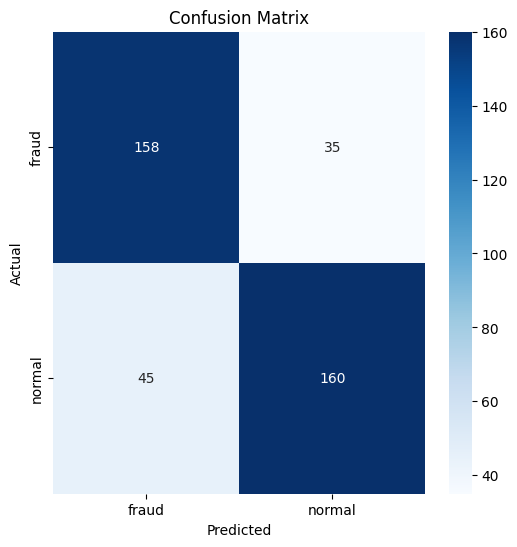

Classification Report:
              precision    recall  f1-score   support

       fraud       0.78      0.82      0.80       193
      normal       0.82      0.78      0.80       205

    accuracy                           0.80       398
   macro avg       0.80      0.80      0.80       398
weighted avg       0.80      0.80      0.80       398



In [2]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 混合行列を計算
cm = confusion_matrix(y_test, y_pred)

# 混合行列をヒートマップで表示
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["fraud", "normal"], yticklabels=["fraud", "normal"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# precision, recall, f1-score などの詳細な評価指標を表示
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["fraud", "normal"]))
